In [1]:
from astropy.io import fits
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

Filename: ../paper2/paper2_data/Fermi_files/psf_P8R3_ULTRACLEANVETO_V2_PSF.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1  RPSF_PSF0     1 BinTableHDU     79   1R x 10C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E]   
  2  PSF_SCALING_PARAMS_PSF0    1 BinTableHDU     39   1R x 1C   [3E]   
  3  FISHEYE_CORRECTION_PSF0    1 BinTableHDU     67   1R x 7C   [46E, 46E, 16E, 16E, 736E, 736E, 736E]   
  4  RPSF_PSF1     1 BinTableHDU     79   1R x 10C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E]   
  5  PSF_SCALING_PARAMS_PSF1    1 BinTableHDU     39   1R x 1C   [3E]   
  6  FISHEYE_CORRECTION_PSF1    1 BinTableHDU     67   1R x 7C   [46E, 46E, 16E, 16E, 736E, 736E, 736E]   
  7  RPSF_PSF2     1 BinTableHDU     79   1R x 10C   [23E, 23E, 8E, 8E, 184E, 184E, 184E, 184E, 184E, 184E]   
  8  PSF_SCALING_PARAMS_PSF2    1 BinTableHDU     39   1R x 1C   [3E]   
  9  FISHEYE_CORRECTION_PSF2    1 BinTabl

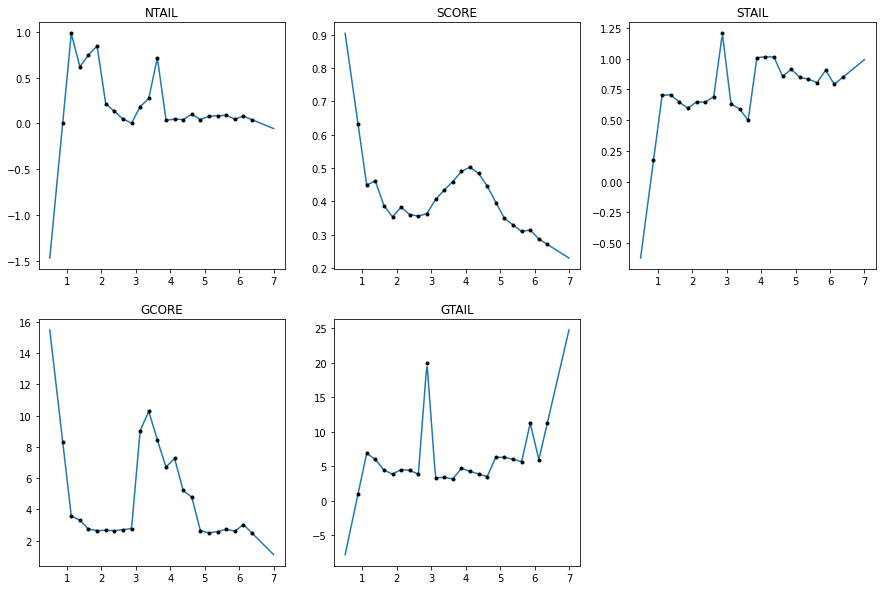

In [2]:
#Applies energy dependent Fermi PSF assuming normal incidence
file = '../paper2/paper2_data/Fermi_files/psf_P8R3_ULTRACLEANVETO_V2_PSF.fits'
event_type = 'PSF3'
scale_hdu = 'PSF_SCALING_PARAMS_' + event_type
fit_hdu = 'RPSF_' + event_type
hdul = fits.open(file)
hdul.info()
print('\n\n', hdul[fit_hdu].header)
C0 = hdul[scale_hdu].data[0][0][0]
C1 = hdul[scale_hdu].data[0][0][1]
beta = hdul[scale_hdu].data[0][0][2]
print('\n\n', 'Scale Parameters (C_0, C_1, beta) = ', (C0, C1, beta))
fit_e = np.linspace(0.875, 6.375, 23)
NTAIL_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][5][7], fill_value = 'extrapolate')
SCORE_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][6][7], fill_value = 'extrapolate')
STAIL_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][7][7], fill_value = 'extrapolate')
GCORE_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][8][7], fill_value = 'extrapolate')
GTAIL_func = interp.interp1d(fit_e, hdul[fit_hdu].data[0][9][7], fill_value = 'extrapolate')
fig, ax = plt.subplots(2,3, figsize = (15,10))
plot_e = np.linspace(0.5, 7, 230)
ax[0,0].plot(plot_e, NTAIL_func(plot_e))
ax[0,0].plot(fit_e, hdul[fit_hdu].data[0][5][7], 'k.')
ax[0,0].set_title('NTAIL')
ax[0,1].plot(plot_e, SCORE_func(plot_e))
ax[0,1].plot(fit_e, hdul[fit_hdu].data[0][6][7], 'k.')
ax[0,1].set_title('SCORE')
ax[0,2].plot(plot_e, STAIL_func(plot_e))
ax[0,2].plot(fit_e, hdul[fit_hdu].data[0][7][7], 'k.')
ax[0,2].set_title('STAIL')
ax[1,0].plot(plot_e, GCORE_func(plot_e))
ax[1,0].plot(fit_e, hdul[fit_hdu].data[0][8][7], 'k.')
ax[1,0].set_title('GCORE')
ax[1,1].plot(plot_e, GTAIL_func(plot_e))
ax[1,1].plot(fit_e, hdul[fit_hdu].data[0][9][7], 'k.')
ax[1,1].set_title('GTAIL')
ax[1,2].remove()
fig.show()
hdul.close()

norm =  0.9942139732374646


Text(0.5, 0, 'log10(scaled deviation)')

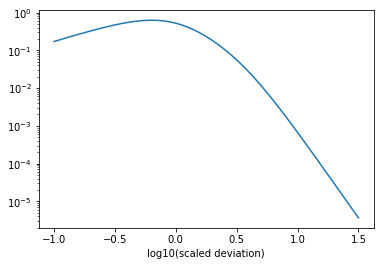

In [19]:
NTAIL = 0.08639
SCORE = 0.5399
STAIL = 1.063
GCORE = 2.651
GTAIL = 2.932
FCORE = 1/(1 + NTAIL*STAIL**2/SCORE**2)
x_vals = 10**np.linspace(-1, 1.5, 1000)
kingCORE = (1/(2*np.pi*SCORE**2))*(1-(1/GCORE))*(1+(1/(2*GCORE))*(x_vals**2/SCORE**2))**(-GCORE)
kingTAIL = (1/(2*np.pi*STAIL**2))*(1-(1/GTAIL))*(1+(1/(2*GTAIL))*(x_vals**2/STAIL**2))**(-GTAIL)
PSF = FCORE*kingCORE + (1-FCORE)*kingTAIL
print('norm = ', np.sum(2*np.pi*x_vals[:-1]*PSF[:-1]*(x_vals[1:]-x_vals[:-1])))
fig, ax = plt.subplots()
ax.plot(np.log10(x_vals), 2*np.pi*x_vals*PSF)
ax.set_yscale('log')
ax.set_xlabel('log10(scaled deviation)')
#x = x_vals[self.draw_from_pdf(x_vals, PSF*2*np.pi*x_vals/np.sum(PSF*2*np.pi*x_vals), np.size(ebin_i))]